<a href="https://colab.research.google.com/github/RoRdil31/Github/blob/main/1_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EA%B8%B0%EC%B4%88_%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

print(clf.predict([[2.,2.]]))

print(clf.predict_proba([[2., 2.]]))


[1]
[[0. 1.]]


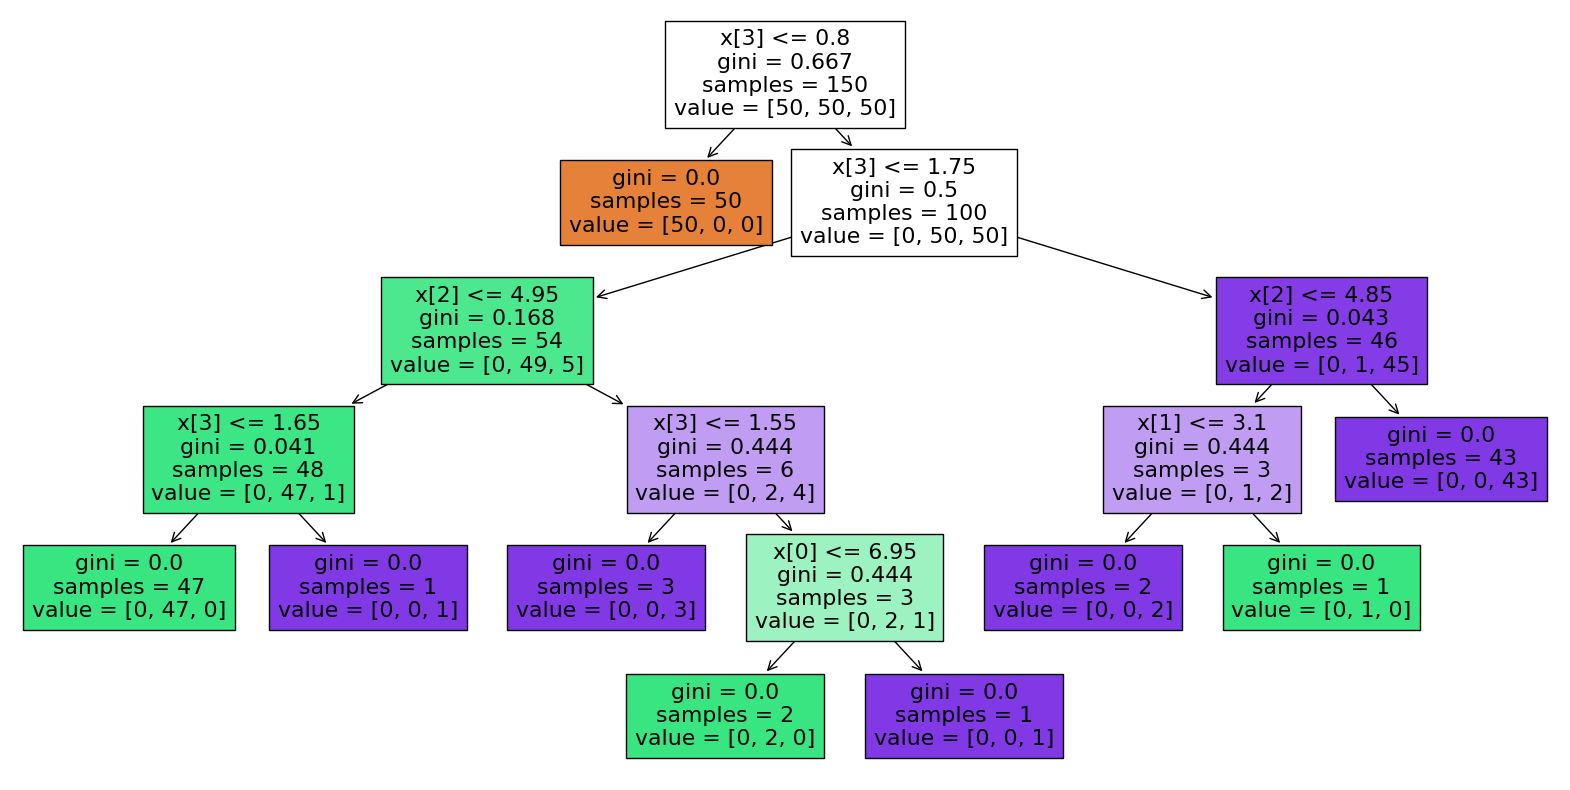

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target
# print(X,y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

t = tree.plot_tree(clf.fit(X,y),filled=True) # filled=True 색 채움.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import drive
drive.mount('/content/mnt/')

import os

os.chdir('/content/mnt/MyDrive/Colab Notebooks/Boostcourse_Project_DS')
print(os.getcwd())


df = pd.read_csv("data/diabetes.csv")
df.shape

Drive already mounted at /content/mnt/; to attempt to forcibly remount, call drive.mount("/content/mnt/", force_remount=True).
/content/mnt/MyDrive/Colab Notebooks/Boostcourse_Project_DS


(768, 9)

In [ ]:
# df.head() # 따로 전처리 필요 없음을 확인.

split_count = int(df.shape[0]*0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [ ]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
label_name = train.columns[-1]
label_name

'Outcome'

In [ ]:
# @title train,test dataset 만들기

X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)

X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape)
print(y_test.shape)


(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
# @title ML algorithm 가져와서 training, predict 하기

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
y_predict[:5]


array([1, 0, 1, 0, 1])

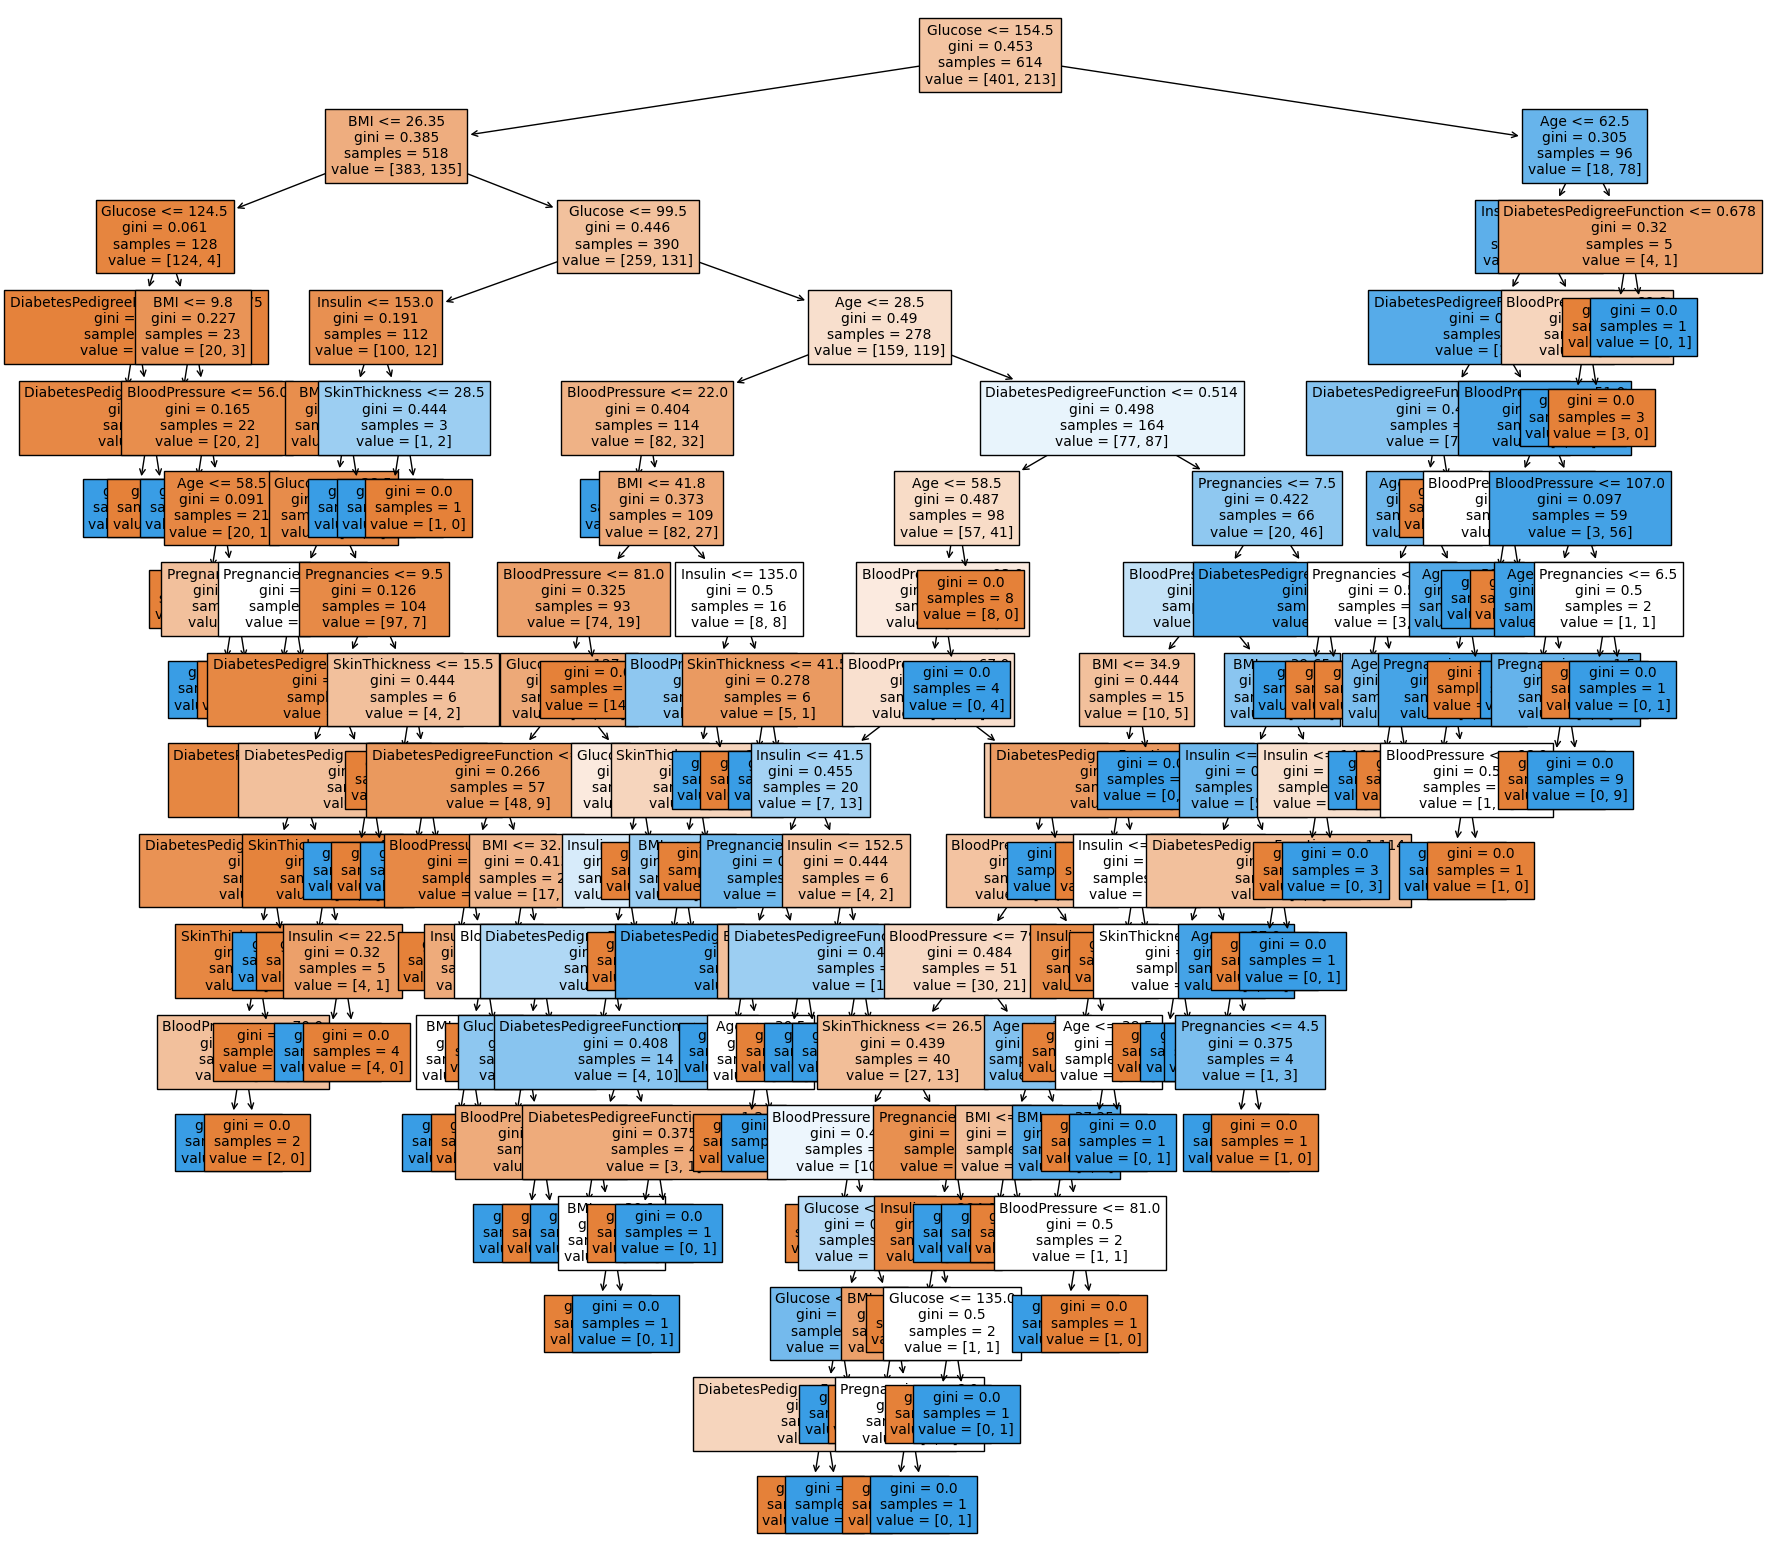

In [ ]:
# @title Tree algorithm 분석

from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)


[0.0758741  0.29057236 0.14361733 0.04257809 0.08320227 0.14336899
 0.12758012 0.09320674]


<Axes: >

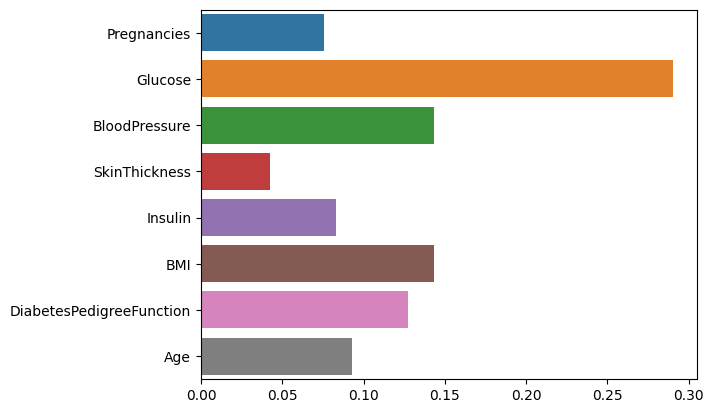

In [ ]:
# @title feature의 중요도 추출,시각화

print(model.feature_importances_)

sns.barplot(x=model.feature_importances_,y=feature_names)


In [ ]:
# @title Accuracy 측정

###################### 방법 1 : 직접 구하기
# 예측 틀린 개수
diff_count = abs(y_test - y_predict).sum()
print(diff_count)
# 예측 정확도
print((len(y_test)-diff_count)/len(y_test))
print()


###################### 방법 2 : import 해서 구하기
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_predict)*100)
print()

###################### 방법 3 : model이 가진 것 사용

model.score(X_test,y_test)*100
# print()



41
0.7337662337662337

73.37662337662337



73.37662337662337